In [1]:
!rm -rf /content/spark-3.3.2-bin-hadoop2

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [6]:
!ls /content/sp*

/content/spark-3.1.1-bin-hadoop3.2.tgz

/content/spark-3.1.1-bin-hadoop3.2:
bin   data	jars	    LICENSE   NOTICE  R		 RELEASE  yarn
conf  examples	kubernetes  licenses  python  README.md  sbin


In [7]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [8]:
!echo $SPARK_HOME

/content/spark-3.1.1-bin-hadoop3.2


In [9]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=52468f22abedc64e74678760d2011ea0c9c2c1225ecf35fbbb396b12363dd1a7
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [10]:
!curl -L -o "/usr/local/lib/python3.10/dist-packages/pyspark/jars/graphframes-0.8.2-spark3.1-s_2.12.jar" https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.1-s_2.12/graphframes-0.8.2-spark3.1-s_2.12.jar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  242k  100  242k    0     0  1326k      0 --:--:-- --:--:-- --:--:-- 1330k


In [11]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .config("spark.jars", "/usr/local/lib/python3.10/dist-packages/pyspark/jars/graphframes-0.8.2-spark3.1-s_2.12.jar") \
    .getOrCreate()

spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

In [12]:
spark.version

'3.1.1'

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
Google_dataset_df = spark.read.csv("/content/Google_Stock_Price_Train.csv", header=True, inferSchema=True)

In [15]:
Google_dataset_df

Date,Open,High,Low,Close,Volume
1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
1/10/2012,313.7,315.72,307.3,621.43,"8,824,000"
1/11/2012,310.59,313.52,309.4,624.25,"4,817,800"
1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
1/13/2012,311.96,312.3,309.37,623.28,"4,631,800"
1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


Selecting only date and open

In [16]:
Google_df_for_graph = Google_df_open = Google_dataset_df.select("Date","Open")

In [17]:
Google_df_open = Google_dataset_df.select("Open")
data_list = Google_df_open.rdd.map(lambda row: [row[0]]).collect()
data = np.array(data_list)

In [18]:
Google_df_open.show()

+------+
|  Open|
+------+
|325.25|
|331.27|
|329.83|
|328.34|
|322.04|
| 313.7|
|310.59|
|314.43|
|311.96|
|314.81|
|312.14|
| 319.3|
|294.16|
|291.91|
|292.07|
|287.68|
|284.92|
|284.32|
|287.95|
|290.41|
+------+
only showing top 20 rows



In [19]:
data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
google_dataset = sc.fit_transform(data)

In [21]:
google_dataset

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [22]:
x_1 = []
y_1 = []

for i in range(60,1258):
  x_1.append(google_dataset[i-60:i,0])# 0 is the column index
  y_1.append(google_dataset[i,0])
#x_train, y_train =np.array(x_train), np.array(y_train)

In [23]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .getOrCreate()

In [24]:
x_rdd = spark.sparkContext.parallelize(x_1)
y_rdd = spark.sparkContext.parallelize(y_1)

In [25]:
x_rdd1=x_rdd.map(lambda x: x.tolist())
y_rdd1=y_rdd.map(lambda x: x.tolist())

In [26]:
y_rdd1.take(10)

[0.08627874097775134,
 0.08471612471166012,
 0.07454051640747084,
 0.07883771113922167,
 0.07238261775429711,
 0.06663442220403304,
 0.06315574075452046,
 0.06782498697819772,
 0.06823424361931696,
 0.07601011980058048]

In [27]:
x_rdd1.take(2)

[[0.08581367661284323,
  0.09701242651983033,
  0.0943336557779596,
  0.0915618721631073,
  0.07984225016742319,
  0.06432770295408885,
  0.05854230225463197,
  0.06568569089962051,
  0.061090854974328423,
  0.06639258873428078,
  0.061425701317062265,
  0.0747451447280304,
  0.027978272192871523,
  0.023792692908698565,
  0.024090334102239708,
  0.015923803854453467,
  0.010789493265867978,
  0.009673338790088581,
  0.016426073368554173,
  0.021002306719249964,
  0.022806756455093335,
  0.02273234615670805,
  0.0281084902150458,
  0.03212664632785178,
  0.04338120395862788,
  0.04475779447875583,
  0.04790162958553468,
  0.044069499218691854,
  0.04648783391621403,
  0.04745516779522285,
  0.048738745442369225,
  0.039363047845821786,
  0.04137212590222494,
  0.040348984299427015,
  0.047845821861745574,
  0.0432509859364536,
  0.04356722970459115,
  0.04286033186993088,
  0.04602276955130591,
  0.053984671478532587,
  0.05738894262965999,
  0.05714710915990773,
  0.05569610834139449,

In [28]:
x_rdd_F = x_rdd1.map(lambda x : [[item] for item in x] )

In [29]:
x_rdd_F.take(2)

[[[0.08581367661284323],
  [0.09701242651983033],
  [0.0943336557779596],
  [0.0915618721631073],
  [0.07984225016742319],
  [0.06432770295408885],
  [0.05854230225463197],
  [0.06568569089962051],
  [0.061090854974328423],
  [0.06639258873428078],
  [0.061425701317062265],
  [0.0747451447280304],
  [0.027978272192871523],
  [0.023792692908698565],
  [0.024090334102239708],
  [0.015923803854453467],
  [0.010789493265867978],
  [0.009673338790088581],
  [0.016426073368554173],
  [0.021002306719249964],
  [0.022806756455093335],
  [0.02273234615670805],
  [0.0281084902150458],
  [0.03212664632785178],
  [0.04338120395862788],
  [0.04475779447875583],
  [0.04790162958553468],
  [0.044069499218691854],
  [0.04648783391621403],
  [0.04745516779522285],
  [0.048738745442369225],
  [0.039363047845821786],
  [0.04137212590222494],
  [0.040348984299427015],
  [0.047845821861745574],
  [0.0432509859364536],
  [0.04356722970459115],
  [0.04286033186993088],
  [0.04602276955130591],
  [0.053984671

In [30]:
Google_x = np.array(x_rdd_F.collect())

In [31]:
Google_x

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [32]:
y_rdd_F = y_rdd1.map(lambda x : [x] )

In [33]:
y_rdd_F.take(2)

[[0.08627874097775134], [0.08471612471166012]]

In [34]:
Google_y = np.array(y_rdd_F.collect())

In [35]:
Google_y

array([[0.08627874],
       [0.08471612],
       [0.07454052],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test = train_test_split(Google_x,Google_y, train_size=0.7)

---------------------------------------------------------------------

In [37]:
import numpy as np

def initialize_weights(num_neurons, num_cells, rows, cols):
    lower_bound = -(1.0 / np.sqrt(num_cells))
    upper_bound = 1.0 / np.sqrt(num_cells)

    weights = lower_bound + np.random.random((rows,  cols)) * (upper_bound - lower_bound)

    return weights


In [38]:
def initialize_gates(rows, cols):
    array = list(np.zeros((rows,cols,1)))
    return array

def initialize_grad_weights(rows,columns):
    return np.zeros((rows, columns))


In [39]:
def sigmoidfunc(x):
    return 1 / (1 + np.exp(-x))

def tanhfunc(x):
    return np.tanh(x)

In [44]:
from pandas._libs.hashtable import value_count
class LSTM_Cell:

  accuracy_list = []
  # the LSTM constructor
  def __init__(self, learning_rate, num_units, num_lstm_cells):
      #Storing acuuracies during training
      self.accuracy_list = []

      #Initialise parameters of lstm to instance
      self.learning_rate = learning_rate
      self.num_units = num_units
      self.num_lstm_cells = num_lstm_cells


      #Initialise gates with zeroes initially
      #Foregt gate
      self.fg = initialize_gates(num_lstm_cells, num_units)
      #Input gate
      self.ig = initialize_gates(num_lstm_cells, num_units)
      #Cell State
      self.cg = initialize_gates(num_lstm_cells, num_units)
      #candidate state
      self.candg = initialize_gates(num_lstm_cells, num_units)
      #Output gate
      self.og = initialize_gates(num_lstm_cells, num_units)
      #Hidden state
      self.hg = initialize_gates(num_lstm_cells, num_units)

      dimension_for_weight_cols = num_units+1
      dimesion_for_weight_rows = num_units
      #Initialise weights to each of these gates
      #Weight of forget gate
      self.wf = initialize_weights(num_units, num_lstm_cells,dimesion_for_weight_rows, dimension_for_weight_cols)
      #Weight of input gate
      self.wi = initialize_weights(num_units, num_lstm_cells,dimesion_for_weight_rows, dimension_for_weight_cols )
      #Weight of candidate cell gate
      self.wc = initialize_weights(num_units, num_lstm_cells, dimesion_for_weight_rows, dimension_for_weight_cols)
      #Weight of output gate
      self.wo = initialize_weights(num_units, num_lstm_cells, dimesion_for_weight_rows, dimension_for_weight_cols)


      dimension_for_bias_cols = 1
      dimesion_for_bias_rows = num_units
      #Initialise bias to each of these gates
      #forget gate
      self.bf = initialize_weights(num_units, num_lstm_cells,dimesion_for_bias_rows, dimension_for_bias_cols)
      #Input gate
      self.bi = initialize_weights(num_units, num_lstm_cells,dimesion_for_bias_rows, dimension_for_bias_cols)
      #cell gate
      self.bc = initialize_weights(num_units, num_lstm_cells,dimesion_for_bias_rows, dimension_for_bias_cols)
      #output gate
      self.bo = initialize_weights(num_units, num_lstm_cells,dimesion_for_bias_rows, dimension_for_bias_cols)

      # Initialise the output weight and bias
      self.w_output = initialize_weights(num_units, num_lstm_cells, 1, num_units)
      self.b_output = initialize_weights(num_units, num_lstm_cells,1, 1)

  def forward(self, X_tst):
    current = 1
    while current<= self.num_lstm_cells-1:
      shaped = X_tst[current].reshape(-1,1)
      concatenated = np.vstack((self.hg[current-1], shaped))
      forget_state,input_state, output_state,candidate_state, internal_state, hidden_state = self.forward_cell(concatenated, current)
      #store all values of current cell
      self.fg[current] = forget_state
      self.ig[current] = input_state
      self.og[current] = output_state
      self.cg[current] = internal_state
      self.candg[current] = candidate_state
      self.hg[current] = hidden_state
      current+=1
    #y_pred = self.w_output @ self.hg[-1] + self.b_output
    y_pred = self.w_output @ self.hg[-1] + self.b_output
    return y_pred

  def forward_cell(self,concatenated, index):
    forget_state = sigmoidfunc(self.wf @ concatenated) + self.bf
    input_state = sigmoidfunc(self.wi @ concatenated) + self.bi
    output_state = sigmoidfunc(self.wo @ concatenated) + self.bo
    candidate_state = tanhfunc(self.wc @ concatenated) +self.bc
    internal_state = self.cg[index-1]*forget_state + input_state *candidate_state
    hidden_state = tanhfunc(internal_state) * output_state
    return forget_state,input_state, output_state,candidate_state, internal_state, hidden_state


# def initialize_gates(rows, cols):
#     array = list(np.zeros((rows,cols,1)))
#     return array

  def backward(self, Y_true, Y_pred, X_tst):
    #Initialise arrays to store all delta values (Gate derivaties)
    fg_del = initialize_gates(self.num_lstm_cells,self.num_units)
    ig_del = initialize_gates(self.num_lstm_cells,self.num_units)
    og_del = initialize_gates(self.num_lstm_cells,self.num_units)
    candg_del = initialize_gates(self.num_lstm_cells,self.num_units)
    cg_del = initialize_gates(self.num_lstm_cells,self.num_units)
    hg_del = initialize_gates(self.num_lstm_cells,self.num_units)



    #Initialise arrays to store gradients of weights (Parameter derivatives)
    der_wf = initialize_grad_weights(self.num_units, 1+ self.num_units)
    der_wi =initialize_grad_weights(self.num_units, 1+ self.num_units)
    der_wc = initialize_grad_weights(self.num_units, 1+ self.num_units)
    der_wo = initialize_grad_weights(self.num_units, 1+ self.num_units)


    #Initialise arrays to store gradients of bias (Parameter derivatives)
    der_bf = initialize_grad_weights(self.num_units, 1)
    der_bo = initialize_grad_weights(self.num_units, 1)
    der_bi = initialize_grad_weights(self.num_units, 1)
    bc_shape = self.bc.shape
    der_bc = np.zeros(bc_shape)


    #Compute diff of prediction
    diff = Y_true - Y_pred

    #Store derivative of output weight
    der_w_output = diff * np.transpose(self.hg[-1])

    current = self.num_lstm_cells-2
    while current >=0:
      hg_del_val,cg_del_val,candg_del_val,ig_del_val,fg_del_val,og_del_val = self.backward_cell(current,fg_del,ig_del,og_del,candg_del,cg_del,hg_del,diff)
      hg_del[current] = hg_del_val
      cg_del[current] = cg_del_val
      candg_del[current] = candg_del_val
      ig_del[current] = ig_del_val
      fg_del[current] = fg_del_val
      og_del[current] = og_del_val
      shaped = X_tst[current].reshape(-1,1)
      concatenated = np.vstack((self.hg[current-1], shaped))
      prod_wf = np.matmul(fg_del[current] , np.transpose(concatenated))
      der_wf =der_wf + prod_wf
      prod_wi = np.matmul(ig_del[current] , np.transpose(concatenated))
      der_wi = der_wi + prod_wi
      prod_wc = np.matmul(cg_del[current] ,np.transpose(concatenated))
      der_wc = der_wc + prod_wc
      prod_wo = np.matmul(og_del[current], np.transpose(concatenated))
      der_wo = der_wo + prod_wo
      der_bi,der_bf,der_bo,der_bc = self.derivative_bias(ig_del[current],fg_del[current],og_del[current],cg_del[current],der_bi,der_bf,der_bo,der_bc)
      current-=1
    return (der_w_output, diff),( der_wf, der_wi, der_wo,  der_wc),(  der_bf, der_bi, der_bo, der_bc )


  def derivative_bias(self,ig_del,fg_del,og_del,cg_del,der_bi,der_bf,der_bo,der_bc):
    der_bi = der_bi + ig_del
    der_bf = der_bf + fg_del
    der_bo = der_bo + og_del
    der_bc = der_bc + cg_del
    return der_bi,der_bf,der_bo,der_bc



  def backward_cell(self,index,fg_del,ig_del,og_del,candg_del,cg_del,hg_del,diff):
    hg_del_val = (self.w_output.T @ diff ) + hg_del[index+1]
    cg_power = hg_del[index] * self.og[index]  * 1-(tanhfunc(self.cg[index]))**2
    cg_del_val =  cg_power + cg_del[index+1]*self.fg[index+1]
    candg_power = cg_del[index] * self.ig[index]
    candg_del_val = candg_power * 1-(self.candg[index])**2
    ig_power_1 = cg_del[index] *self.candg[index]
    ig_power_2 = self.ig[index] * (1- self.ig[index])
    ig_del_val = ig_power_1 * ig_power_2
    fg_power_1 = cg_del[index]  * self.cg[index-1]
    fg_power_2 = self.fg[index]*(1-self.fg[index])
    fg_del_val = fg_power_1 * fg_power_2
    product_of_og = self.og[index]*(1-self.og[index])
    og_del_val = hg_del[index] * tanhfunc(self.cg[index]) * product_of_og
    return hg_del_val,cg_del_val,candg_del_val,ig_del_val,fg_del_val,og_del_val


  def fit(self, epochs, X_tst, Y_actual):
    n = len(Y_actual)
    summation = sum(list(Y_actual))
    aveg_y= summation/n
    for epoch in range(epochs):
      squared_error, deviation, Y_pred = self.list_initialization()
      for current in range(len(X_tst)):
        current_value = X_tst[current]
        Y_pred_single= self.forward(current_value)
        separate, weights, bias = self.backward(Y_actual[current], Y_pred_single,X_tst[current])
        der_w_output, diff = separate
        der_wf, der_wi, der_wo,  der_wc = weights
        der_bf, der_bi, der_bo, der_bc = bias
        self.wf = self.wf + self.find_rate(self.learning_rate , der_wf , self.num_lstm_cells)
        self.wi= self.wi+ self.find_rate(self.learning_rate , der_wi , self.num_lstm_cells)
        self.wc = self.wc + self.find_rate(self.learning_rate , der_wc , self.num_lstm_cells)
        self.wo = self.wo + self.find_rate(self.learning_rate , der_wo , self.num_lstm_cells)
        self.bf = self.bf + self.find_rate(self.learning_rate , der_bf , self.num_lstm_cells)
        self.bi = self.bi + self.find_rate(self.learning_rate , der_bi , self.num_lstm_cells)
        self.bc = self.bc + self.find_rate(self.learning_rate , der_bc , self.num_lstm_cells)
        self.bo = self.bo + self.find_rate(self.learning_rate , der_bo , self.num_lstm_cells)
        diff_rate = self.learning_rate * diff
        self.b_output = self.b_output + diff_rate
        output_rate = self.learning_rate * der_w_output
        self.w_output = self.w_output + output_rate
        difference_values = Y_actual[current] - Y_pred_single
        squared_error.append(difference_values**2)
        deviation.append((Y_pred_single-aveg_y)**2)
        Y_pred.append(Y_pred_single)
      rmse, r2score = get_metrics(Y_actual,Y_pred)
      training_loss=((sum(squared_error)/2 )/ len(X_tst))[0][0]
      #print("Epoch: " ,epoch,"/epochs" Training loss: ", (training_loss_combined/len(X_tst))[0][0], " r2 Score: ", r2score," RMSE: ", rmse)
      print("Epoch:",epoch,"/",epochs-1," Training loss: ",training_loss," RMSE: ", rmse,"r2 Score:", r2score)
      self.accuracy_list.append((epoch,training_loss,r2score[0],rmse[0]))

  def find_rate(self, learning_rate, derivative, lstmcells):
    Value= learning_rate * derivative/lstmcells
    return Value

  def list_initialization(self):
    nm_lst =[]
    dnm_lst=[]
    y_list =[]
    return nm_lst,dnm_lst,y_list


  def predict(self, test_x):
    preds = []
    curr_inde=0
    while(curr_inde< len(test_x)):
      index=test_x[curr_inde]
      pr= self.forward(index)
      preds.append(pr)
      curr_inde = curr_inde+1
    return preds



In [41]:
def get_metrics(Y_actual,Y_predicted):
        squared_errors=[]
        for i in range(len(Y_predicted)):
            squared_errors.append((Y_actual[i]-Y_predicted[i])**2)
        rmse = np.sqrt((sum(squared_errors)/len(Y_actual)).astype(np.float32))[0]
        r2 = 1-(sum(squared_errors)/len(Y_actual))[0]
        return (rmse,r2)



In [42]:

def training(X_train,Y_train,X_test,Y_test,lstm_cells, num_units, lr, num_epochs ):
    lstm_instance = LSTM_Cell(lr,num_units,lstm_cells)
    lstm_instance.fit(num_epochs , X_train, Y_train)
    predicted_train = lstm_instance.predict(X_train)
    X_train_pred =np.concatenate(predicted_train)
    predicted_test = lstm_instance.predict(X_test)
    X_test_pred = np.concatenate(predicted_test)
    mse_train,r2score_train = get_metrics(list(Y_train),list(X_train_pred ))
    print("The R2 score for the train set is",r2score_train)
    print("The RMSE score for the train set is",mse_train)
    mse_test, r2score_test = get_metrics(list(Y_test),list(X_test_pred))
    print("The R2 score of test set is", r2score_test)
    print("The RMSE score of test set is",mse_test)
    #return X_test_pred,lstm_instance.accuracy_list
    return X_train_pred,X_test_pred,

In [57]:
lstm_cells = 60
num_units = 5
num_epochs = 15
lr = 0.07
google_preds = training(X_train,Y_train,X_test,Y_test, lstm_cells, num_units, lr, num_epochs)

Epoch: 0 / 14  Training loss:  0.038562214895877064  RMSE:  [0.27771285] r2 Score: [0.92287557]
Epoch: 1 / 14  Training loss:  0.03841724955872227  RMSE:  [0.27719036] r2 Score: [0.9231655]
Epoch: 2 / 14  Training loss:  0.03796126552249224  RMSE:  [0.27554044] r2 Score: [0.92407747]
Epoch: 3 / 14  Training loss:  0.0375868578526065  RMSE:  [0.27417824] r2 Score: [0.92482628]
Epoch: 4 / 14  Training loss:  0.03698281811053867  RMSE:  [0.27196625] r2 Score: [0.92603436]
Epoch: 5 / 14  Training loss:  0.03640293935727689  RMSE:  [0.26982564] r2 Score: [0.92719412]
Epoch: 6 / 14  Training loss:  0.035832179799513975  RMSE:  [0.267702] r2 Score: [0.92833564]
Epoch: 7 / 14  Training loss:  0.03527039605495414  RMSE:  [0.26559517] r2 Score: [0.92945921]
Epoch: 8 / 14  Training loss:  0.03471744699551072  RMSE:  [0.263505] r2 Score: [0.93056511]
Epoch: 9 / 14  Training loss:  0.03417319371186823  RMSE:  [0.26143143] r2 Score: [0.93165361]
Epoch: 10 / 14  Training loss:  0.0336374994786008  RM

In [46]:
X_train_pred_1 = google_preds[0]
X_test_pred_1 = google_preds[1]


In [47]:
X_train_pred= np.array(spark.sparkContext.parallelize(X_train_pred_1).flatMap(lambda x: x).collect())
X_test_pred= np.array(spark.sparkContext.parallelize(X_test_pred_1).flatMap(lambda x: x).collect())

In [48]:
Y_train_1 = spark.sparkContext.parallelize(Y_train)
Y_train_grph= Y_train_1.collect()
Y_test_1 = spark.sparkContext.parallelize(Y_test)
Y_test_grph= Y_test_1.collect()

In [49]:
#Scaling the data
new_min = 0.1
new_max = 1
min_value = np.min(X_train_pred)
max_value = np.max(X_train_pred)
scaled_values=[]
# Perform min-max scaling to map the values to the new range
for val in X_train_pred:
  values = (X_train_pred - min_value) / (max_value - min_value) * (new_max - new_min) + new_min
  scaled_values.append(values)

value_data = np.array(scaled_values)
scaled_data_list =spark.sparkContext.parallelize(value_data).flatMap(lambda x :x ).take(838)


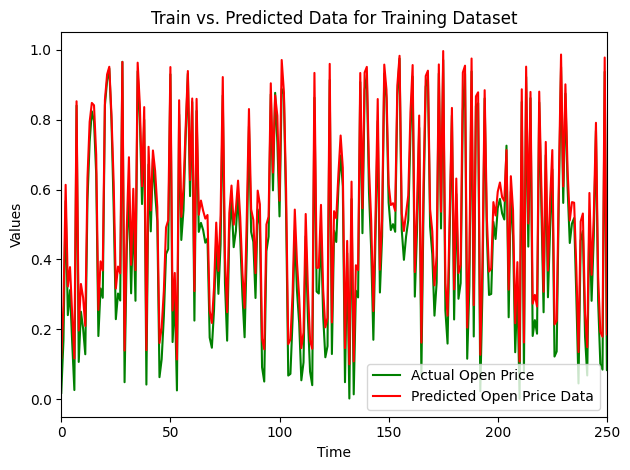

In [50]:
# Plot the 'train_data' on the y-axis with dates on the x-axis
Y_train_grph_2 = [val * 1 for val in Y_train_grph]
plt.plot(Y_train_grph_2, label='Actual Open Price', color='Green')
X_train_pred_2 = [val * 1 for val in X_train_pred]
# Plot the 'predict_data' on the y-axis with dates on the x-axis
plt.plot(scaled_data_list, label='Predicted Open Price Data', color='Red')

# Add labels, title, and legend
plt.xlim(0, 250)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Train vs. Predicted Data for Training Dataset')
plt.legend()


# Show the plot
plt.tight_layout()
plt.show()

In [51]:
#Scaling the data
new_min = 0.1
new_max = 1
min_value = np.min(X_test_pred)
max_value = np.max(X_test_pred)
scaled_values_test=[]
# Perform min-max scaling to map the values to the new range
for val in X_test_pred:
  values = (X_test_pred - min_value) / (max_value - min_value) * (new_max - new_min) + new_min
  scaled_values_test.append(values)

value_data_test = np.array(scaled_values_test)
scaled_data_list_test =spark.sparkContext.parallelize(value_data_test).flatMap(lambda x :x ).take(360)


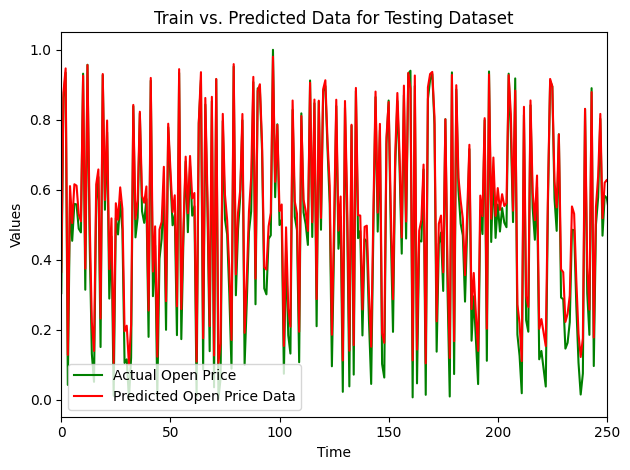

In [52]:
# Plot the 'test_data' on the y-axis with dates on the x-axis
plt.plot(Y_test_grph, label='Actual Open Price', color='Green')
# Plot the 'predict_data' on the y-axis with dates on the x-axis
plt.plot(scaled_data_list_test, label='Predicted Open Price Data', color='Red')
# Add labels, title, and legend
plt.xlim(0, 250)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Train vs. Predicted Data for Testing Dataset')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()